<a href="https://colab.research.google.com/github/ramaalaghbar/introduction-to-github/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-df6a67699c47>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


Accuracy: 0.5642
Precision: 0.4583
Recall: 0.2973
F1 Score: 0.3607
ROC AUC: 0.5608
Confusion Matrix:
 [[79 26]
 [52 22]]


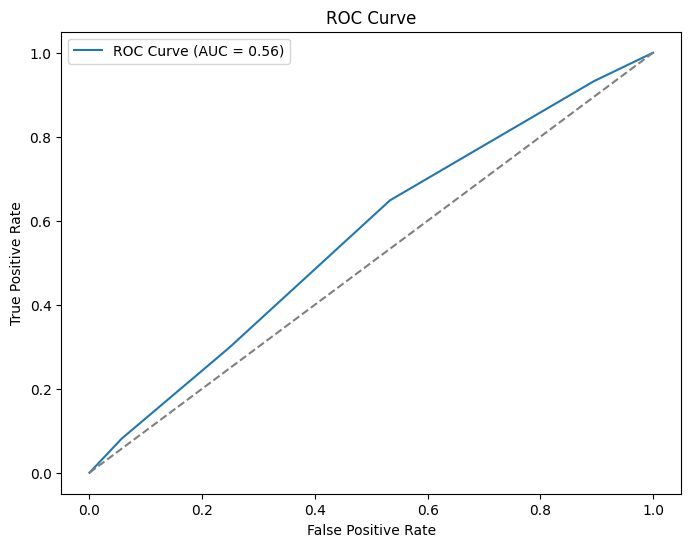

<Figure size 800x500 with 0 Axes>

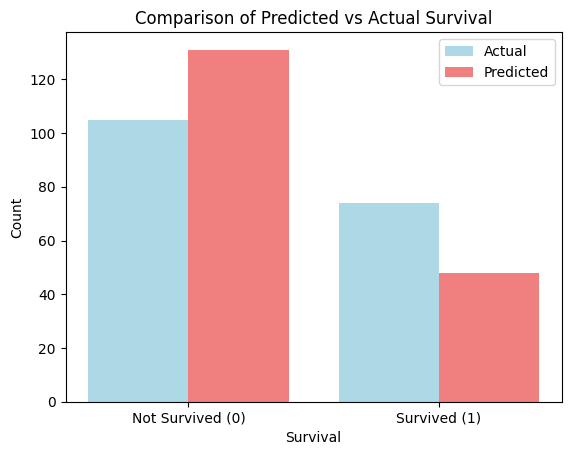

<Figure size 600x600 with 0 Axes>

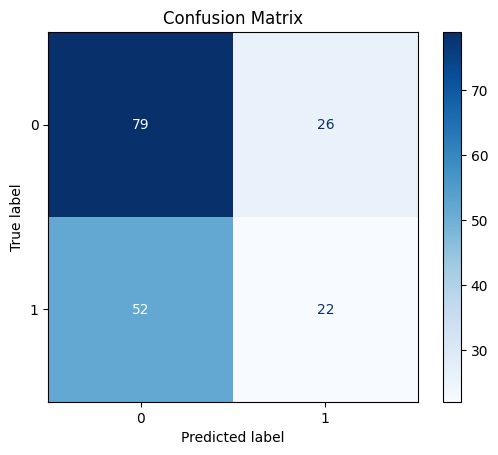

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay

# loading trains dataset
df = pd.read_csv("train.csv")

def preprocess_data(df):
    df = df.drop(["Name", "Ticket", "Cabin"], axis=1)

    # Fill missing values
    imputer = SimpleImputer(strategy='median')
    df['Age'] = imputer.fit_transform(df[['Age']])
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Convert categorical variables to numeric
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

    # Standardize numerical features
    scaler = StandardScaler()
    df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

    return df

# preprocess data
df = preprocess_data(df)

# define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot comparison of predicted vs actual values as a bar chart
plt.figure(figsize=(8, 5))
labels = ['Not Survived (0)', 'Survived (1)']
actual_counts = [sum(y_test == 0), sum(y_test == 1)]
predicted_counts = [sum(y_pred == 0), sum(y_pred == 1)]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual', color='lightblue')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted', color='lightcoral')

ax.set_xlabel('Survival')
ax.set_ylabel('Count')
ax.set_title('Comparison of Predicted vs Actual Survival')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# plot
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()